In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
from torchsummary import summary
import numpy as np

In [3]:
# Load the dataset

df = pd.read_csv('D:/K1_nam4/인공지능개론/artificial-intelligence/AI_class/artificial-intelligence/week10/dataFrame/AAME.csv')
# Display the first few rows of the dataset
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-17,0.0,4.05,3.85,3.85,3.213167,15000
1,1980-03-18,0.0,4.00,3.80,3.80,3.171437,10200
2,1980-03-19,0.0,4.05,3.85,3.85,3.213167,33500
3,1980-03-20,0.0,4.00,3.80,3.80,3.171437,8700
4,1980-03-21,0.0,3.95,3.75,3.75,3.129709,12700


In [5]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:", missing_values)

Missing values in each column: Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [6]:
# Check the data types of each column
data_types = df.dtypes
print("Data types of each column:", data_types)

Data types of each column: Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


In [7]:
df.duplicated().sum()

np.int64(0)

Epoch 1/20


D:\Python\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


314/314 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - loss: 0.0020
Epoch 2/20
314/314 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 2.0062e-04
Epoch 3/20
314/314 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - loss: 1.8206e-04
Epoch 4/20
314/314 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - loss: 1.4638e-04
Epoch 5/20
314/314 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - loss: 1.3249e-04
Epoch 6/20
314/314 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - loss: 1.2382e-04
Epoch 7/20
314/314 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - loss: 1.1857e-04
Epoch 8/20
314/314 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - loss: 1.1681e-04
Epoch 9/20
314/314 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - loss: 9.6817e-05
Epoch 10/20
314/314 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - loss: 1.0097e-04
Epoch 11/20
314/314 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - loss: 1.0281e-04
Epoch 12/20
314/314 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 9.6849e-05
Epoch 13/20
314/314 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 9.2799e-05
Epoch 14/20
314/314 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - loss: 7.4216e-05
Ep

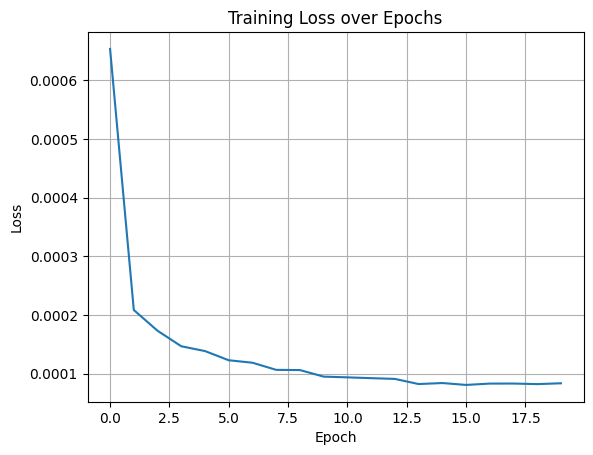

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
🌟 Dự đoán giá ngày tiếp theo: 2.1641905


In [10]:
from sklearn.preprocessing import MinMaxScaler
from keras.src.layers import Dense
from keras.src.layers import LSTM
from keras import Sequential

df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# 2. Tiền xử lý - chuẩn hóa dữ liệu
close_prices = df[['Close']].values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_close = scaler.fit_transform(close_prices)

# 3. Tạo tập huấn luyện (dựa trên 60 ngày)
sequence_length = 60
x_train, y_train = [], []

for i in range(sequence_length, len(scaled_close)):
    x_train.append(scaled_close[i-sequence_length:i, 0])
    y_train.append(scaled_close[i, 0])

x_train = np.array(x_train)
y_train = np.array(y_train)

# 4. Định dạng dữ liệu cho LSTM
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# 5. Xây dựng mô hình LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# 6. Huấn luyện mô hình
history = model.fit(x_train, y_train, epochs=20, batch_size=32, verbose=1)

# 7. Vẽ biểu đồ loss
plt.plot(history.history['loss'])
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# 8. Dự đoán thử cho chuỗi mới nhất
latest_sequence = scaled_close[-60:]  # 60 ngày gần nhất
latest_sequence = np.reshape(latest_sequence, (1, 60, 1))
predicted_price = model.predict(latest_sequence)
predicted_price = scaler.inverse_transform(predicted_price)

print("🌟 Dự đoán giá ngày tiếp theo:", predicted_price[0][0])

In [11]:
# du doan gia 10 ngay tiep theo
predicted_prices = []
for _ in range(10):
    latest_sequence = scaled_close[-60:]  # 60 ngày gần nhất
    latest_sequence = np.reshape(latest_sequence, (1, 60, 1))
    predicted_price = model.predict(latest_sequence)
    predicted_prices.append(predicted_price[0][0])
    
    # Cập nhật dữ liệu để dự đoán ngày tiếp theo
    scaled_close = np.append(scaled_close, predicted_price)
    scaled_close = scaled_close.reshape(-1, 1)
predicted_prices = scaler.inverse_transform(np.array(predicted_prices).reshape(-1, 1))
print("🌟 Dự đoán giá 10 ngày tiếp theo:", predicted_prices.flatten())


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
🌟 Dự đoán giá 10 ngày tiếp theo: [2.1641905 2.1782362 2.1911314 2.2026172 2.2128227 2.2220333 2.2305605
 2.2386773 2.2465892 2.2544365]
